In [7]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
# from carps.analysis.process_data import get_interpolated_performance_df, load_logs, process_logs
import importlib
import carps
import carps.analysis
import carps.analysis.gather_data
importlib.reload(carps)
importlib.reload(carps.analysis.gather_data)
from carps.analysis.gather_data import normalize_logs, get_interpolated_performance_df, load_logs, process_logs, load_set


def print_overview(df_trials: pd.DataFrame) -> None:
    print(df_trials.columns)
    print(df_trials["optimizer_id"].unique())
    print(df_trials["benchmark_id"].unique())
    print(df_trials["problem_id"].unique())
    print(df_trials["scenario"].unique())
    print("Number of seeds", df_trials["seed"].nunique())


# rundir = "../runs"
# df, df_cfg = load_logs(rundir=rundir)
# df = pd.read_csv("../logs_combined.csv")
# df_cfg = pd.read_csv("../logs_combined_cfg.csv")

paths = {
    "BBfull": {
        "full": [
        "../runs/SMAC3-BlackBoxFacade",
        "../runs/RandomSearch",
        "../runs/Nevergrad-CMA-ES",
    ]},
    "MOfull": {
        "full": ["../runs_MO"]
    },
    "BBsubset": {
        "dev": ["../runs_subset_BB/dev"],
        "test": ["../runs_subset_BB/test"],
    },
    "MFsubset": {
        "dev": ["../runs_subset_MF/dev"],
        "test": ["../runs_subset_MF/test"],
    },
    "MOsubset": {
        "dev": ["../runs_subset_MO/dev"],
        "test": ["../runs_subset_MO/test"],
    },
    "MOMFsubset": {
        "dev": ["../runs_subset_MOMF/dev"],
        "test": ["../runs_subset_MOMF/test"],
    },
}
subset = "BBsubset"
problem_prefix = "blackbox/20"

# subset = "MFsubset"
# problem_prefix = "multifidelity/20"

# subset = "MOsubset"
# problem_prefix = "multiobjective/10"

# subset = "MOMFsubset"
# problem_prefix = "momf/9"



loaded = [load_set(paths=ps, set_id=set_id) for set_id, ps in paths[subset].items()]
df = pd.concat([d for d, _ in loaded]).reset_index(drop=True)
df_cfg = pd.concat([d for _, d in loaded]).reset_index(drop=True)


print(df.columns)
df = normalize_logs(df)
print_overview(df)
perf = get_interpolated_performance_df(df)
perf_time = get_interpolated_performance_df(df, x_column="time_norm")

Index(['problem_id', 'optimizer_id', 'seed', 'level_3', 'n_trials',
       'n_function_calls', 'trial_info__config', 'trial_info__instance',
       'trial_info__seed', 'trial_info__budget',
       'trial_info__normalized_budget', 'trial_info__name',
       'trial_info__checkpoint', 'trial_value__cost', 'trial_value__time',
       'trial_value__virtual_time', 'trial_value__status',
       'trial_value__starttime', 'trial_value__endtime', 'benchmark_id',
       'problem.problem.rng', 'problem.seed', 'trial_value__cost_raw',
       'trial_value__cost_inc', 'scenario', 'time', 'problem.model',
       'problem.task_id', 'problem.budget_type', 'problem.bench',
       'problem.instance', 'problem.metric', 'problem.dimension',
       'problem.fid', 'experiment_id', 'set'],
      dtype='object')


[09:48:17] INFO     Start normalization...                                                       ]8;id=456201;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=438579;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#360\360]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=240593;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=153178;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#361\361]8;;\

           INFO     Normalize cost...                                                            ]8;id=673040;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=760416;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#363\363]8;;\

           INFO     Calc normalized incumbent cost...                                            ]8;id=676504;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=253508;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#372\372]8;;\

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[09:48:19] INFO     Normalize time...                                                            ]8;id=184571;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=476248;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#392\392]8;;\

[09:48:20] INFO     Done.                                                                        ]8;id=688474;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=886266;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#395\395]8;;\

Index(['problem_id', 'optimizer_id', 'seed', 'level_3', 'n_trials',
       'n_function_calls', 'trial_info__config', 'trial_info__instance',
       'trial_info__seed', 'trial_info__budget',
       'trial_info__normalized_budget', 'trial_info__name',
       'trial_info__checkpoint', 'trial_value__cost', 'trial_value__time',
       'trial_value__virtual_time', 'trial_value__status',
       'trial_value__starttime', 'trial_value__endtime', 'benchmark_id',
       'problem.problem.rng', 'problem.seed', 'trial_value__cost_raw',
       'trial_value__cost_inc', 'scenario', 'time', 'problem.model',
       'problem.task_id', 'problem.budget_type', 'problem.bench',
       'problem.instance', 'problem.metric', 'problem.dimension',
       'problem.fid', 'experiment_id', 'set', 'n_trials_norm',
       'trial_value__cost_norm', 'trial_value__cost_log',
       'trial_value__cost_inc_log', 'trial_value__cost_log_norm',
       'trial_value__cost_inc_log_norm', 'trial_value__cost_inc_norm',
       'trial

[09:48:21] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=48856;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=930459;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#452\452]8;;\
                    budget.                                                                                        

[09:48:25] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=344290;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=896029;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#452\452]8;;\
                    budget.                                                                                        

blackbox/20/dev/bbob/noiseless/2/12/0 295.19677345393416 1031348165.3995711
blackbox/20/dev/bbob/noiseless/2/12/1 -620.7934089265852 57103079874.24471
blackbox/20/dev/bbob/noiseless/2/20/0 183.12068349788652 196511.0541610639
blackbox/20/dev/bbob/noiseless/4/6/1 37.3281078950267 596352.6358829259
blackbox/20/dev/hpobench/bb/tab/ml/lr/146818 0.15512195121951222 0.4487804878048781
blackbox/20/dev/hpobench/bb/tab/ml/rf/146212 3.4831069313856486e-05 0.2140369209334727
blackbox/20/dev/hpobench/bb/tab/ml/xgboost/146212 0.0 0.0009172181585974659
blackbox/20/dev/hpobench/bb/tab/nas/NavalPropulsionBenchmark 3.19113473778998e-05 19.94593060016632
blackbox/20/dev/hpobench/bb/tab/nas/SliceLocalizationBenchmark 0.00019159916337230243 9066.102081298828
blackbox/20/dev/yahpo/lcbench/168335/None -99.66401672363281 -43.19892883300781


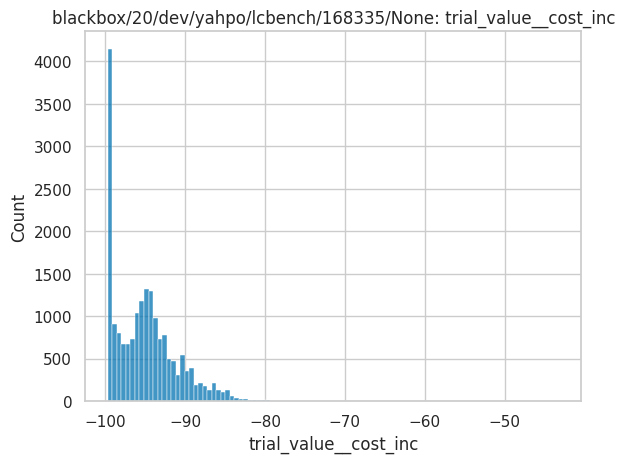

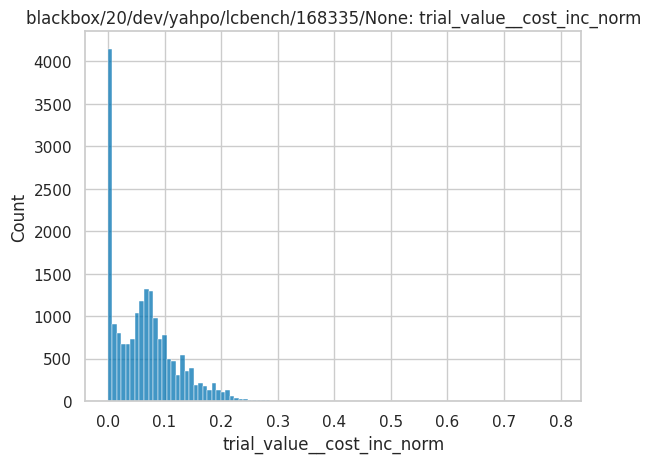

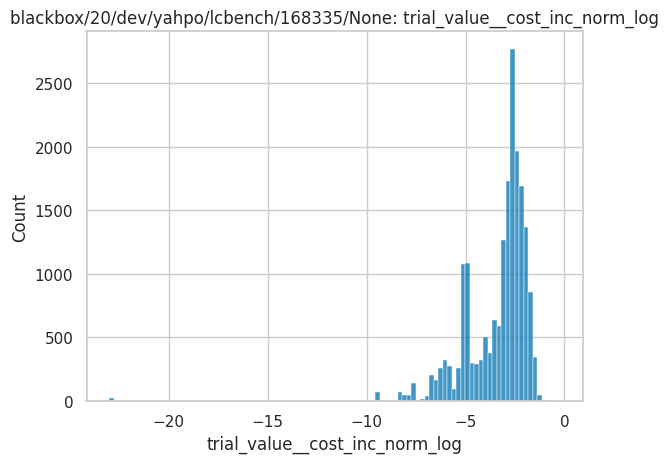

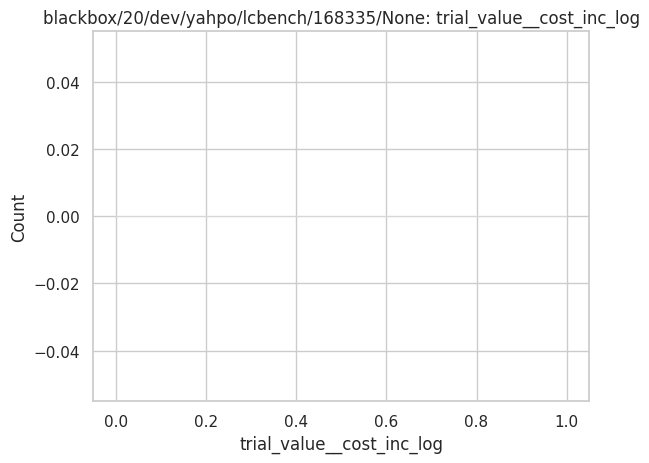

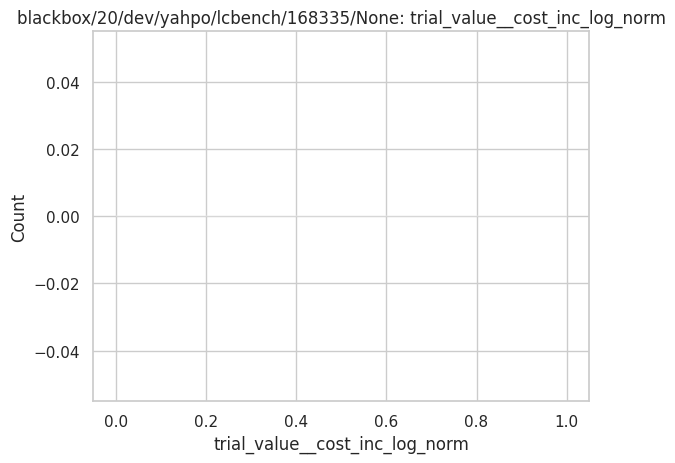

In [10]:
import seaborn as sns

def calculate_auc(df: pd.DataFrame, x_column: str = "n_trials_norm", perf_column: str = "trial_value__cost_inc_norm") -> pd.DataFrame:
    df = df.copy()
    df["delta_x"] = df[x_column].diff()
    df["delta_y"] = df[perf_column].diff()
    auc = df["delta_x"] * df[perf_column]
    auc = auc.cumsum()
    return auc

for gid, gdf in perf.groupby(by=["problem_id", "optimizer_id", "seed"]):
    # print(gid)
    # gdf["auc"]
    # print(gdf)
    # print(calculate_auc(gdf))
    # print(np.log(gdf["trial_value__cost_inc_norm"]))
    break

sns.set_style("whitegrid")

result_variants = [
    "trial_value__cost_inc",
    "trial_value__cost_inc_norm",
    "trial_value__cost_inc_norm_log",
    "trial_value__cost_inc_log",
    "trial_value__cost_inc_log_norm",
]


for gid, gdf in df.groupby("problem_id"):
    print(gid, gdf["trial_value__cost_inc"].min(), gdf["trial_value__cost_inc"].max())
    if "yahpo" in gid:
        for result_variant in result_variants:
            ax = sns.histplot(gdf[result_variant], bins=100)
            ax.set_title(f"{gid}: {result_variant}")
            plt.show()
        break
    else:
        continue


In [2]:
# Calculate time
from carps.analysis.utils import filter_only_final_performance
df_final = filter_only_final_performance(df=df)
print("Runtime", subset, df_final["time"].sum() / 60 / 60)

Runtime BBsubset 22489.597163556296


----------------------------------------------------------------------------------------------------
('blackbox', 'dev')


/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/pandas/core/groupby/ops.py:919: RuntimeWarning: Mean of empty slice
  res = f(group)


[09:48:49] INFO     Lost following experiments: optimizer_id                                    ]8;id=658689;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=97713;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#113\113]8;;\
                    HEBO  Nevergrad-BayesOpt  \                                                                    
                    problem_id                                                                                     
                    blackbox/20/dev/yahpo/lcbench/168335/None       NaN                 NaN                        
                    blackbox/20/dev/yahpo/rbv2_aknn/1462/None       NaN                 NaN                        
                    blackbox/20/dev/yahpo/rbv2_aknn/312/None        NaN                 NaN                        
                    blackbox/20/dev/yahpo/rbv2_aknn/40498/None      NaN                 NaN                        
                    blackbox/20/dev/yahpo/rbv2_aknn/458/None        NaN                 NaN                        
                    blackbox/20/dev/yahpo/rbv2_glmnet/41157/None    NaN                 NaN                        
                    blackbox/20/dev/yahpo/rbv2_ranger/40927/None    NaN                 NaN                        
                    blackbox/20/dev/yahpo/rbv2_svm/182/None         NaN                 NaN                        
                    blackbox/20/dev/yahpo/rbv2_svm/24/None          NaN                 NaN                        
                    blackbox/20/dev/yahpo/rbv2_xgboost/23512/None   NaN                 NaN                        
                    blackbox/20/dev/yahpo/rbv2_xgboost/42/None      NaN                 NaN                        
                                                                                                                   
                    optimizer_id                                   Nevergrad-CMA-ES  Optuna-TPE                    
                    \                                                                                              
                    problem_id                                                                                     
                    blackbox/20/dev/yahpo/lcbench/168335/None                   NaN         NaN                    
                    blackbox/20/dev/yahpo/rbv2_aknn/1462/None                   NaN         NaN                    
                    blackbox/20/dev/yahpo/rbv2_aknn/312/None                    NaN         NaN                    
                    blackbox/20/dev/yahpo/rbv2_aknn/40498/None                  NaN         NaN                    
                    blackbox/20/dev/yahpo/rbv2_aknn/458/None                    NaN         NaN                    
                    blackbox/20/dev/yahpo/rbv2_glmnet/41157/None                NaN         NaN                    
                    blackbox/20/dev/yahpo/rbv2_ranger/40927/None                NaN         NaN                    
                    blackbox/20/dev/yahpo/rbv2_svm/182/None                     NaN         NaN                    
                    blackbox/20/dev/yahpo/rbv2_svm/24/None                      NaN         NaN                    
                    blackbox/20/dev/yahpo/rbv2_xgboost/23512/None               NaN         NaN                    
                    blackbox/20/dev/yahpo/rbv2_xgboost/42/None                  NaN         NaN                    
                                                                                                                   
                    optimizer_id                                   RandomSearch  \                                 
                    problem_id                                                                                     
                    b

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:235: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)],
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:243: FutureWarning: Series.__getitem__ treating ke

Fail to reject null hypothesis that data is normal for column HEBO (p=0.045995>=0.005556)
Rejecting null hypothesis that data is normal for column Nevergrad-BayesOpt (p=0.000058<0.005556)
Rejecting null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.000003<0.005556)
Rejecting null hypothesis that data is normal for column Optuna-TPE (p=0.000012<0.005556)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.001134<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.000948<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-HPOFacade (p=0.000192<0.005556)
Rejecting null hypothesis that data is normal for column Scikit_Optimize (p=0.000231<0.005556)
Rejecting null hypothesis that data is normal for column SyneTune-BO (p=0.000313<0.005556)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.019214)
Using Nemenyi post-hoc t

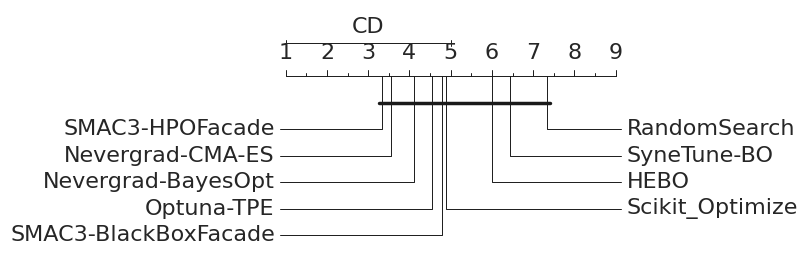

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/pandas/core/groupby/ops.py:919: RuntimeWarning: Mean of empty slice
  res = f(group)


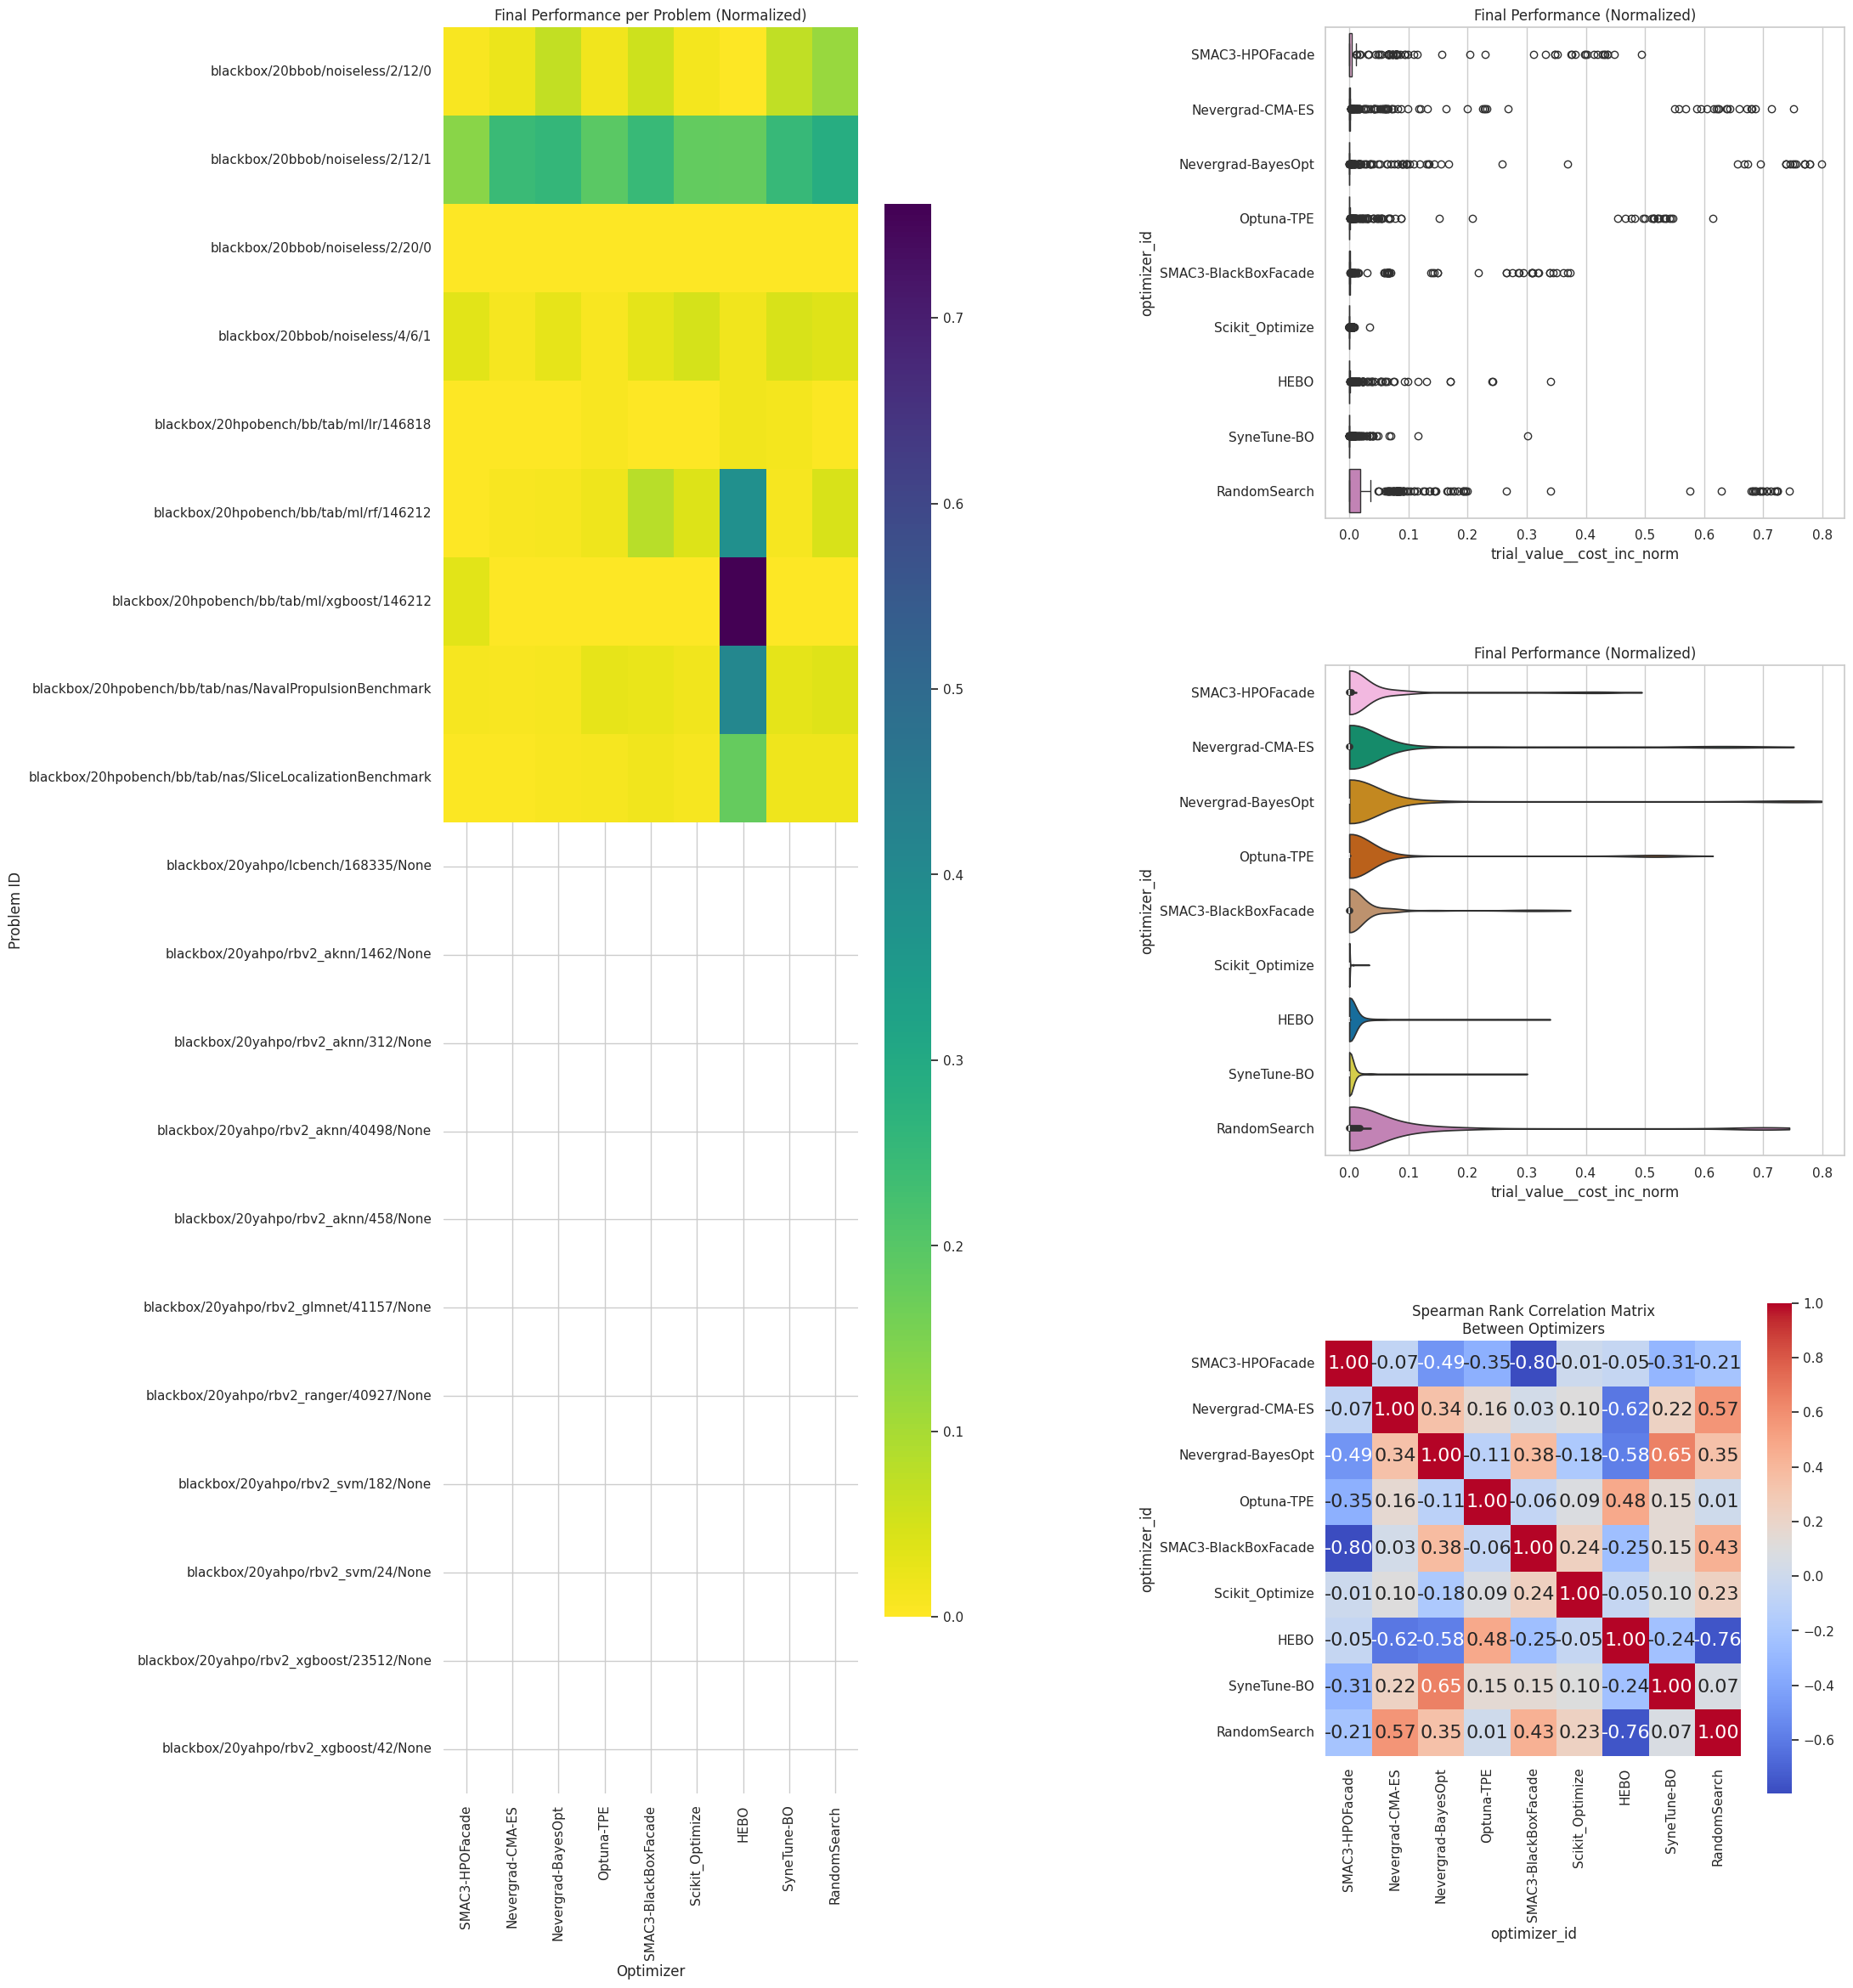

----------------------------------------------------------------------------------------------------
('blackbox', 'test')


/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/pandas/core/groupby/ops.py:919: RuntimeWarning: Mean of empty slice
  res = f(group)


[09:48:56] INFO     Lost following experiments: optimizer_id                                    ]8;id=53293;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=298652;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#113\113]8;;\
                    HEBO  Nevergrad-BayesOpt  \                                                                    
                    problem_id                                                                                     
                    blackbox/20/test/bbob/noiseless/2/9/0           0.365164                                       
                    0.385681                                                                                       
                    blackbox/20/test/bbob/noiseless/32/9/0          0.206365                                       
                    0.647963                                                                                       
                    blackbox/20/test/yahpo/lcbench/167184/None           NaN                                       
                    NaN                                                                                            
                    blackbox/20/test/yahpo/rbv2_glmnet/32/None           NaN                                       
                    NaN                                                                                            
                    blackbox/20/test/yahpo/rbv2_glmnet/375/None          NaN                                       
                    NaN                                                                                            
                    blackbox/20/test/yahpo/rbv2_ranger/29/None           NaN                                       
                    NaN                                                                                            
                    blackbox/20/test/yahpo/rbv2_rpart/18/None            NaN                                       
                    NaN                                                                                            
                    blackbox/20/test/yahpo/rbv2_rpart/4534/None          NaN                                       
                    NaN                                                                                            
                    blackbox/20/test/yahpo/rbv2_svm/1493/None            NaN                                       
                    NaN                                                                                            
                    blackbox/20/test/yahpo/rbv2_xgboost/1457/None        NaN                                       
                    NaN                                                                                            
                    blackbox/20/test/yahpo/rbv2_xgboost/1493/None        NaN                                       
                    NaN                                                                                            
                    blackbox/20/test/yahpo/rbv2_xgboost/1510/None        NaN                                       
                    NaN                                                                                            
                    blackbox/20/test/yahpo/rbv2_xgboost/41027/None       NaN                                       
                    NaN                                                                                            
                                                                                                                   
                    optimizer_id                                    Nevergrad-CMA-ES                               
                    Optuna-TPE  \                                                                                  
                    p

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:235: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)],
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:243: FutureWarning: Series.__getitem__ treating ke

Fail to reject null hypothesis that data is normal for column HEBO (p=0.072508>=0.005556)
Fail to reject null hypothesis that data is normal for column Nevergrad-BayesOpt (p=0.058804>=0.005556)
Fail to reject null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.157260>=0.005556)
Fail to reject null hypothesis that data is normal for column Optuna-TPE (p=0.258256>=0.005556)
Fail to reject null hypothesis that data is normal for column RandomSearch (p=0.494490>=0.005556)
Fail to reject null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.071012>=0.005556)
Fail to reject null hypothesis that data is normal for column SMAC3-HPOFacade (p=0.251931>=0.005556)
Fail to reject null hypothesis that data is normal for column Scikit_Optimize (p=0.054166>=0.005556)
Fail to reject null hypothesis that data is normal for column SyneTune-BO (p=0.287526>=0.005556)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the dis

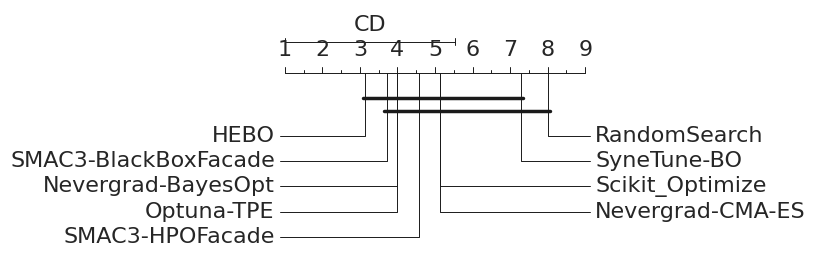

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/pandas/core/groupby/ops.py:919: RuntimeWarning: Mean of empty slice
  res = f(group)


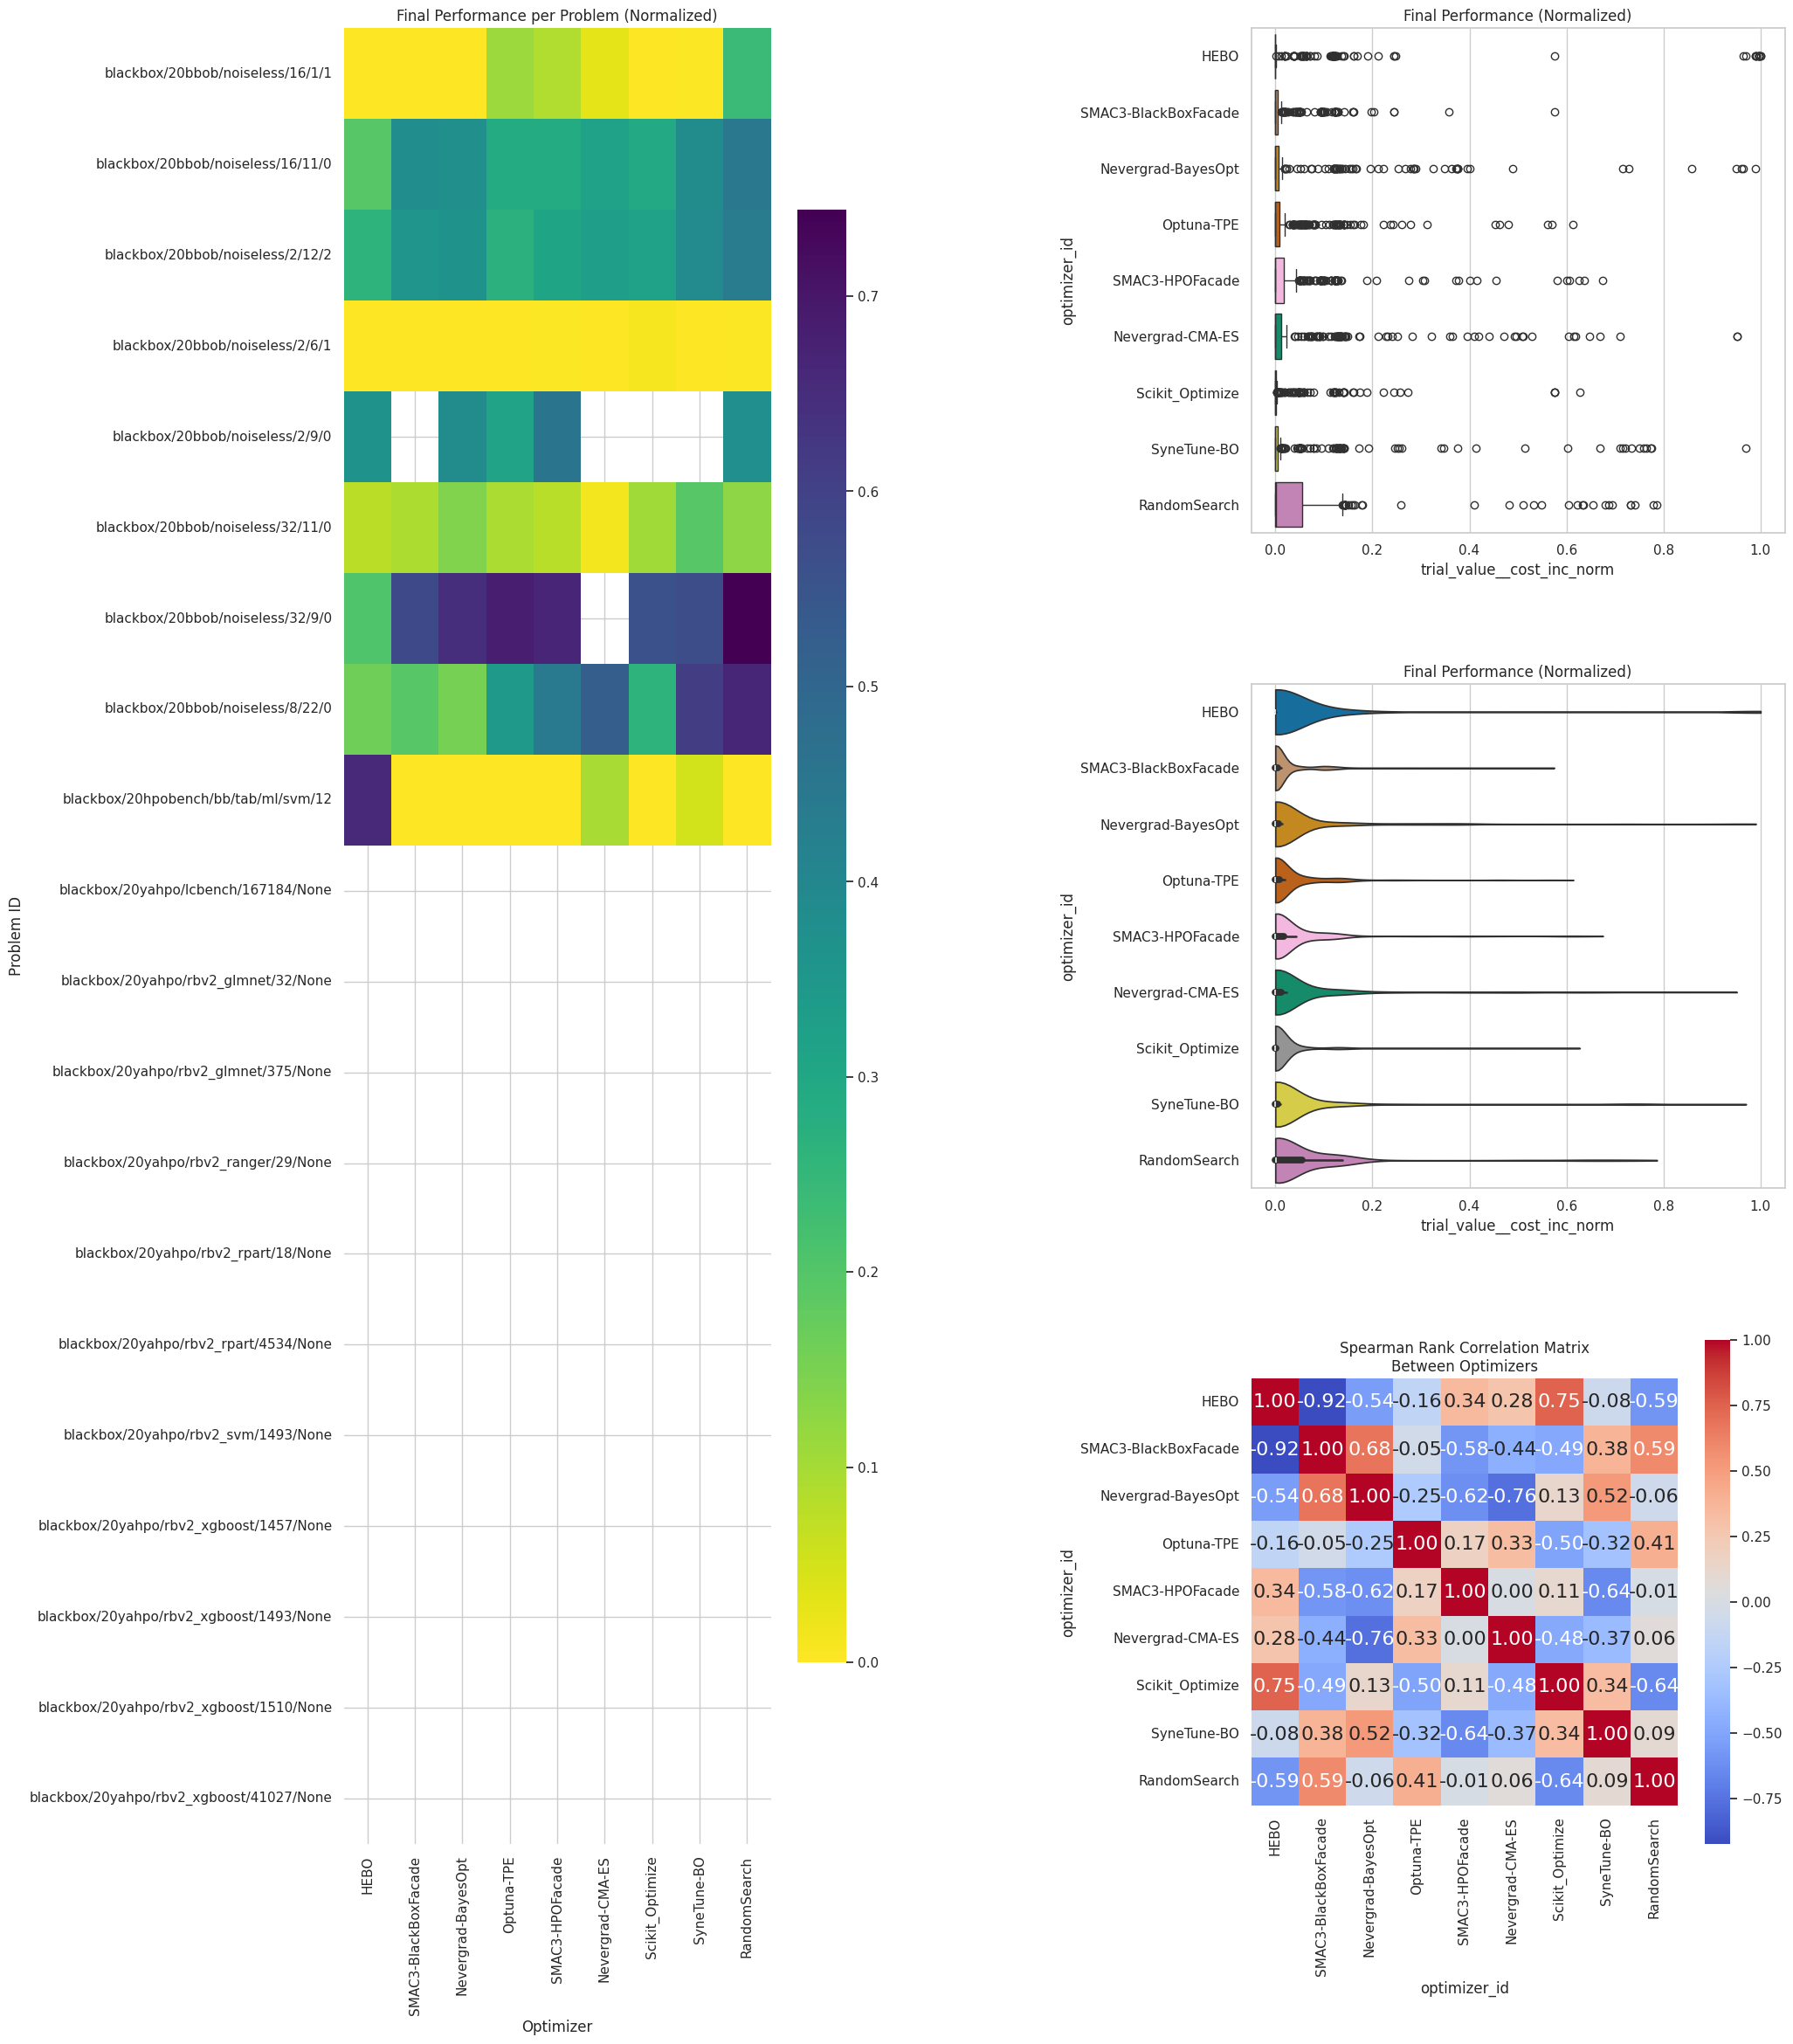

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from carps.analysis.utils import setup_seaborn
import seaborn as sns
import importlib
import carps
import carps.analysis
import carps.analysis.plot_ranking
importlib.reload(carps)
importlib.reload(carps.analysis)
importlib.reload(carps.analysis.plot_ranking)
from carps.analysis.plot_ranking import plot_ranking
from autorank._util import RankResult, get_sorted_rank_groups

setup_seaborn(font_scale=1)

rank_results = {}
for gid, gdf in df.groupby(by=["scenario", "set"]):    
    print("-"*100)
    print(gid)
    scenario, set_id = gid
    perf_col = "trial_value__cost_inc_log_norm"
    if len(gdf) > 0:
        rank_result = plot_ranking(gdf=gdf, scenario=scenario, set_id=set_id, perf_col=perf_col)
        rank_results[gid] = rank_result


In [ ]:

# fig, axes = plot_interval_estimates(performance_data=perf, load_from_pickle=False, figure_filename="figures/plot_interval_estimates.pdf")

blackbox_dev
blackbox_test
plot over time
blackbox_dev
blackbox_test


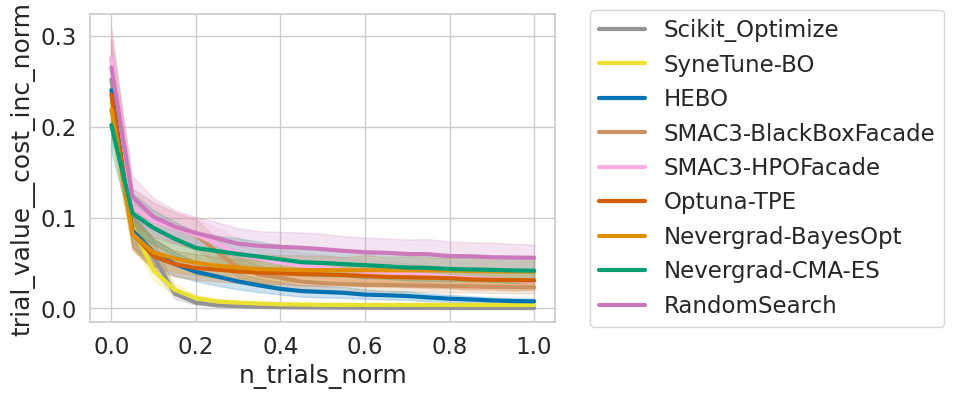

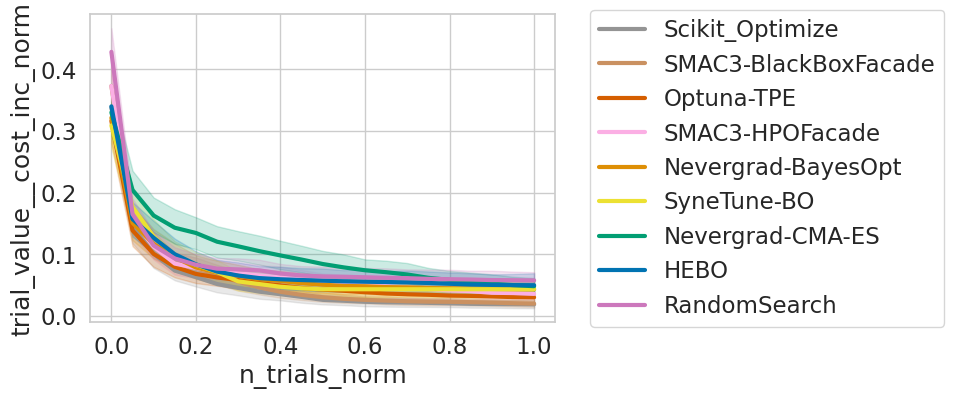

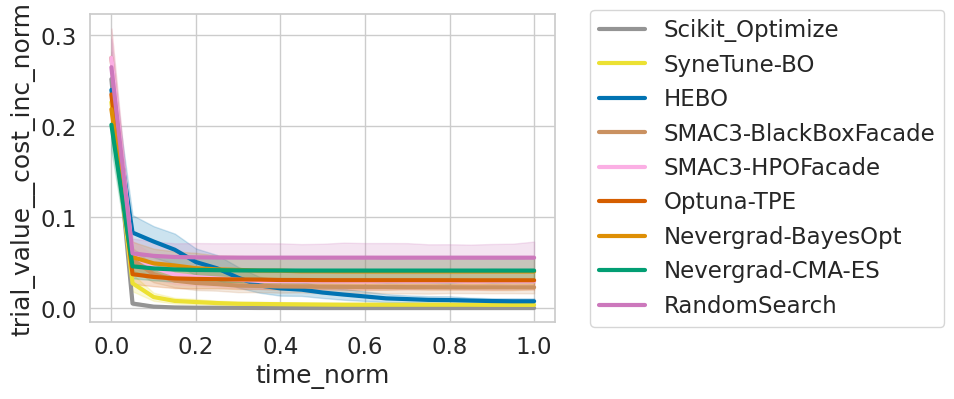

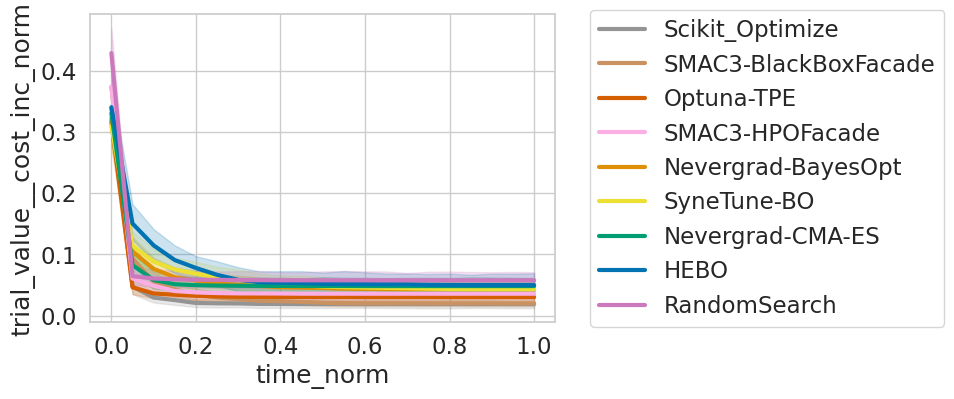

In [4]:
from carps.analysis.performance_over_time import plot_performance_over_time, setup_seaborn, savefig, get_color_palette
import seaborn as sns
import matplotlib
lineplot_kwargs = dict(linewidth=3)
for gid, gdf in perf.groupby(by=["scenario", "set"]):
    gid = '_'.join(gid)
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="n_trials_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_trials", 
        figsize=(6,4), 
        **lineplot_kwargs
    )
print("plot over time")
for gid, gdf in perf_time.groupby(by=["scenario", "set"]):
    gid = '_'.join(gid)
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="time_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_elapsed", 
        figsize=(6,4), 
        **lineplot_kwargs
    )

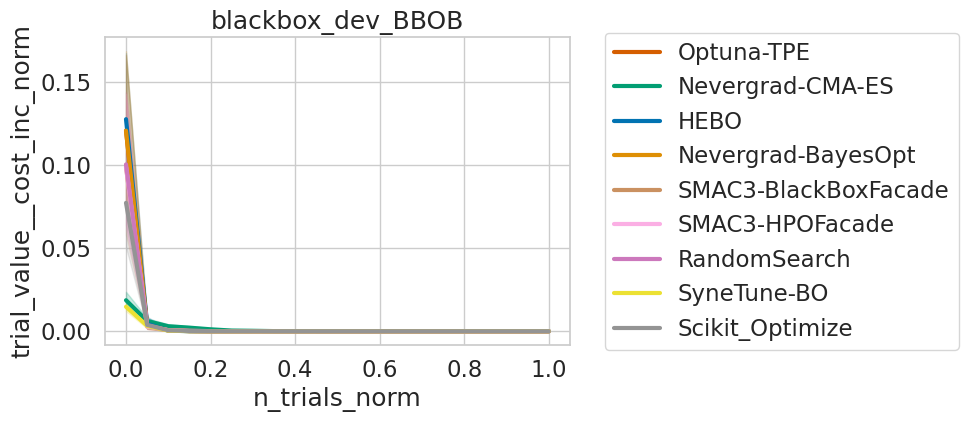

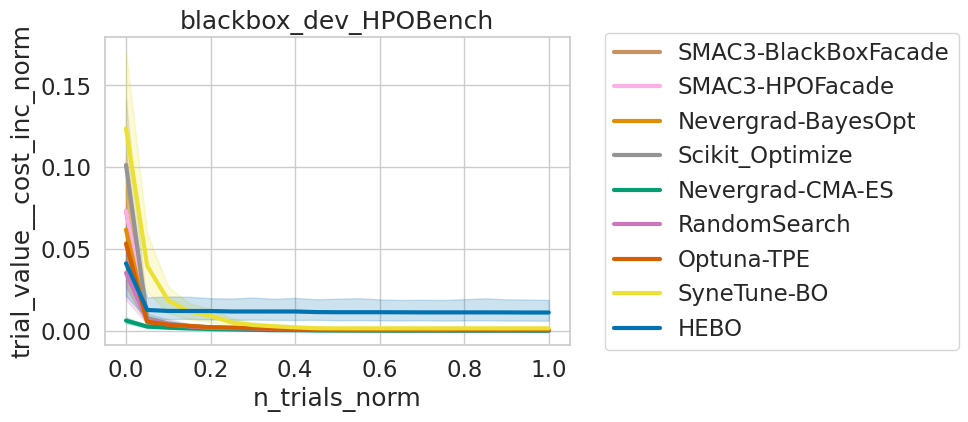

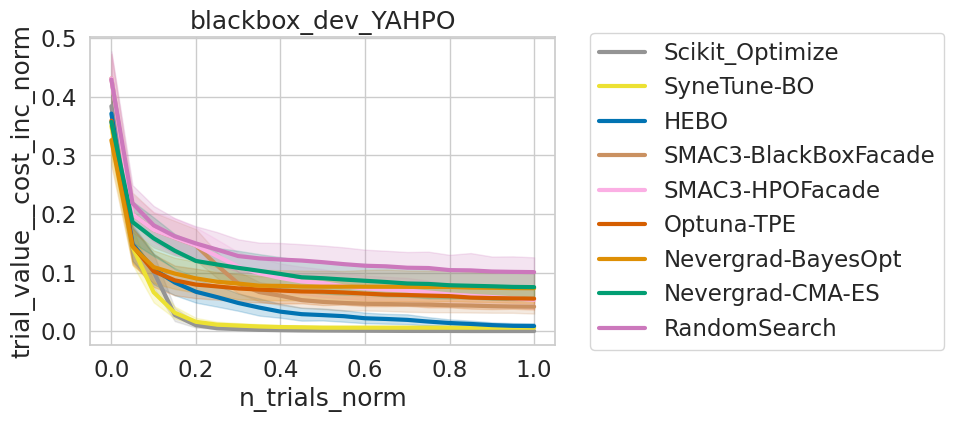

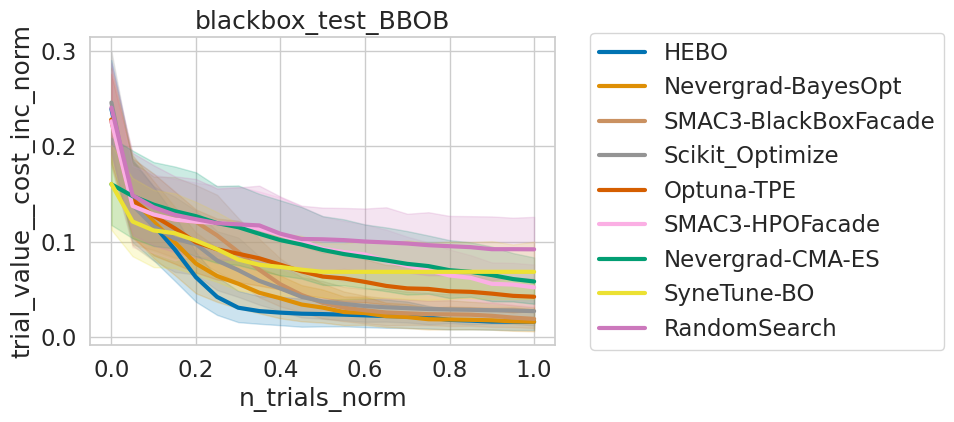

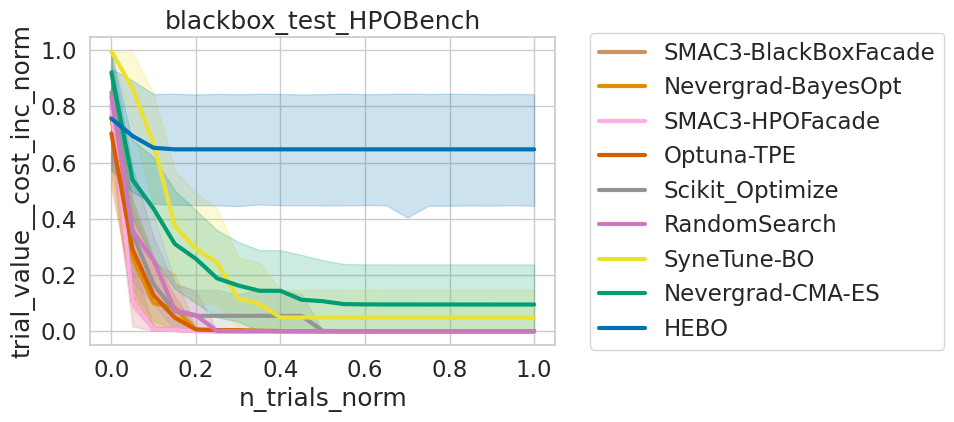

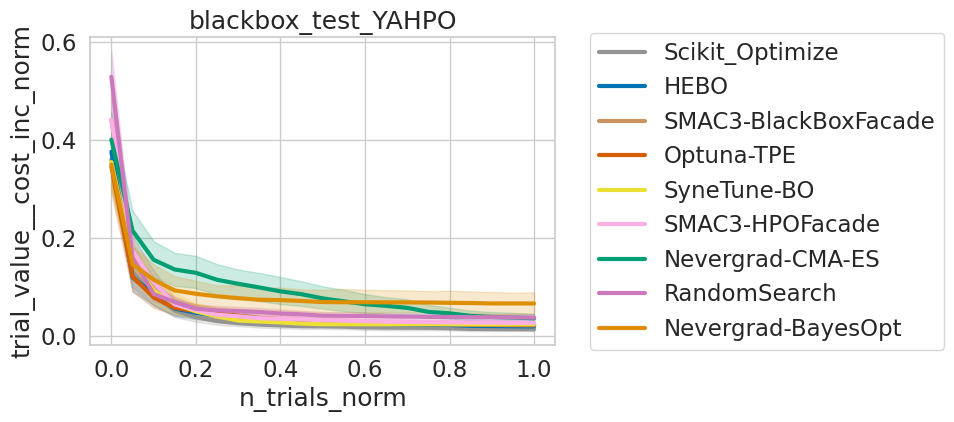

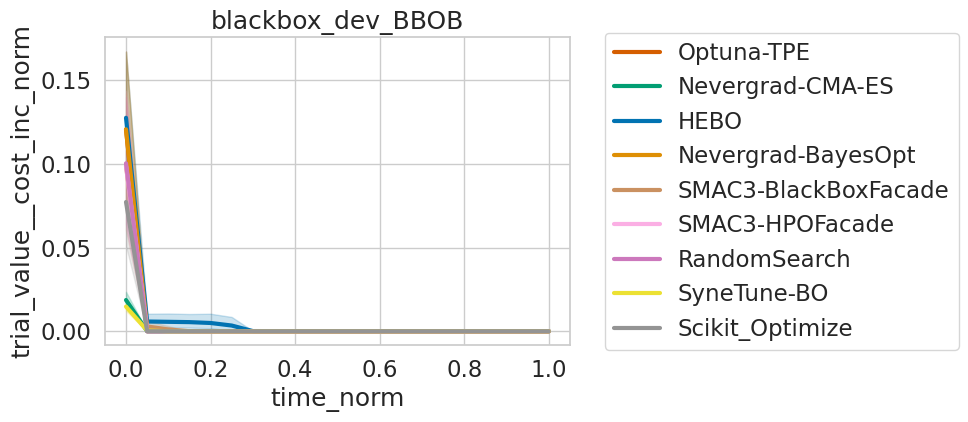

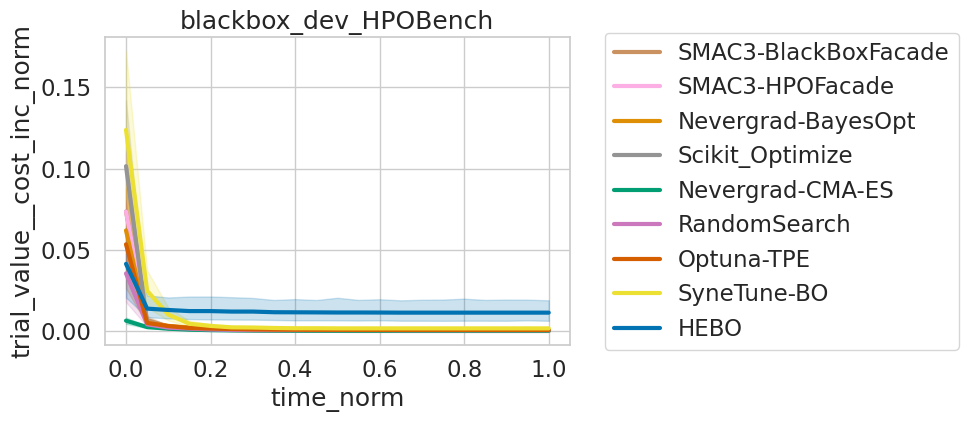

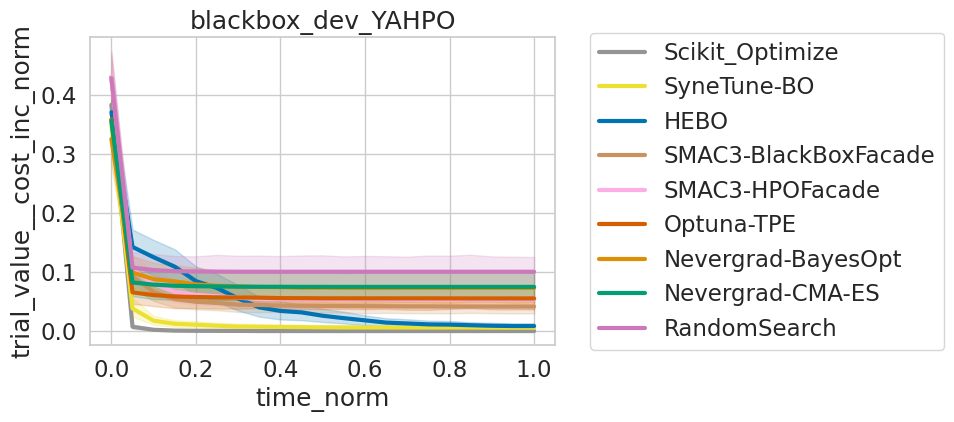

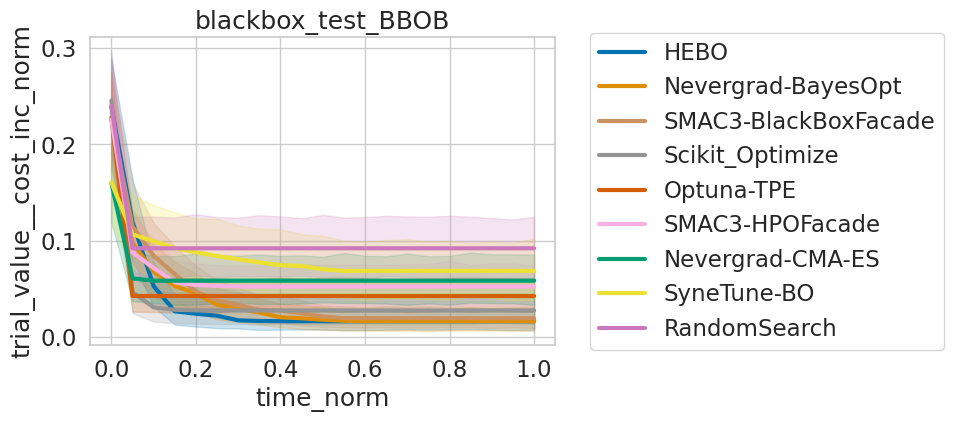

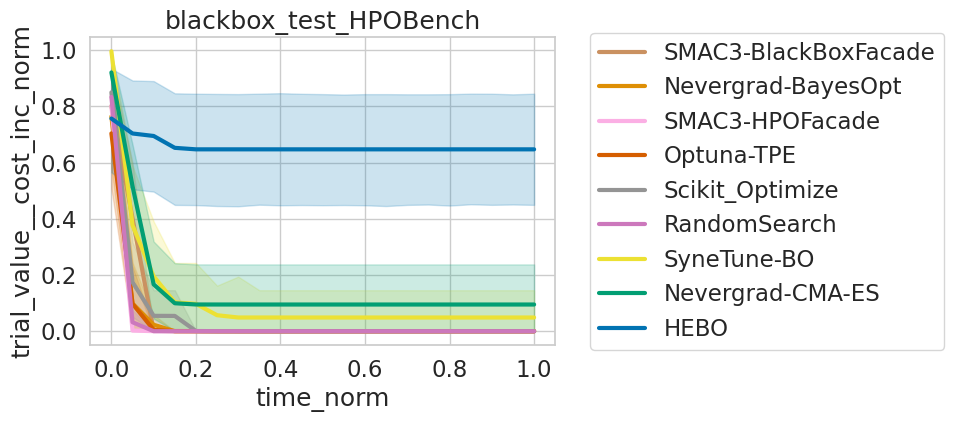

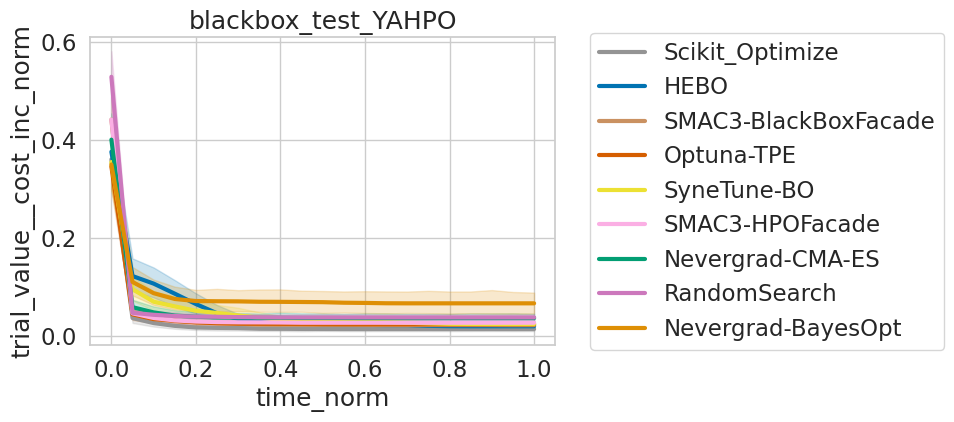

In [5]:
# Plot per benchmark
from carps.analysis.utils import get_color_palette, savefig
from carps.analysis.performance_over_time import plot_performance_over_time

palette = get_color_palette(perf)
lineplot_kwargs = dict(linewidth=3)

for gid, gdf in perf.groupby(by=["scenario", "set", "benchmark_id"]):
    gid = '_'.join(gid)
    # Iterations
    figure_filename = f"figures/perf_over_time/performance_over_time_trials_{gid}"
    fig, ax = plot_performance_over_time(df=gdf, x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

# Elapsed time
for gid, gdf in perf_time.groupby(by=["scenario", "set", "benchmark_id"]):    
    gid = '_'.join(gid)
    figure_filename = f"figures/perf_over_time/performance_over_time_elapsed_{gid}"
    fig, ax = plot_performance_over_time(df=gdf, x="time_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

('blackbox', 'dev')
('blackbox', 'test')


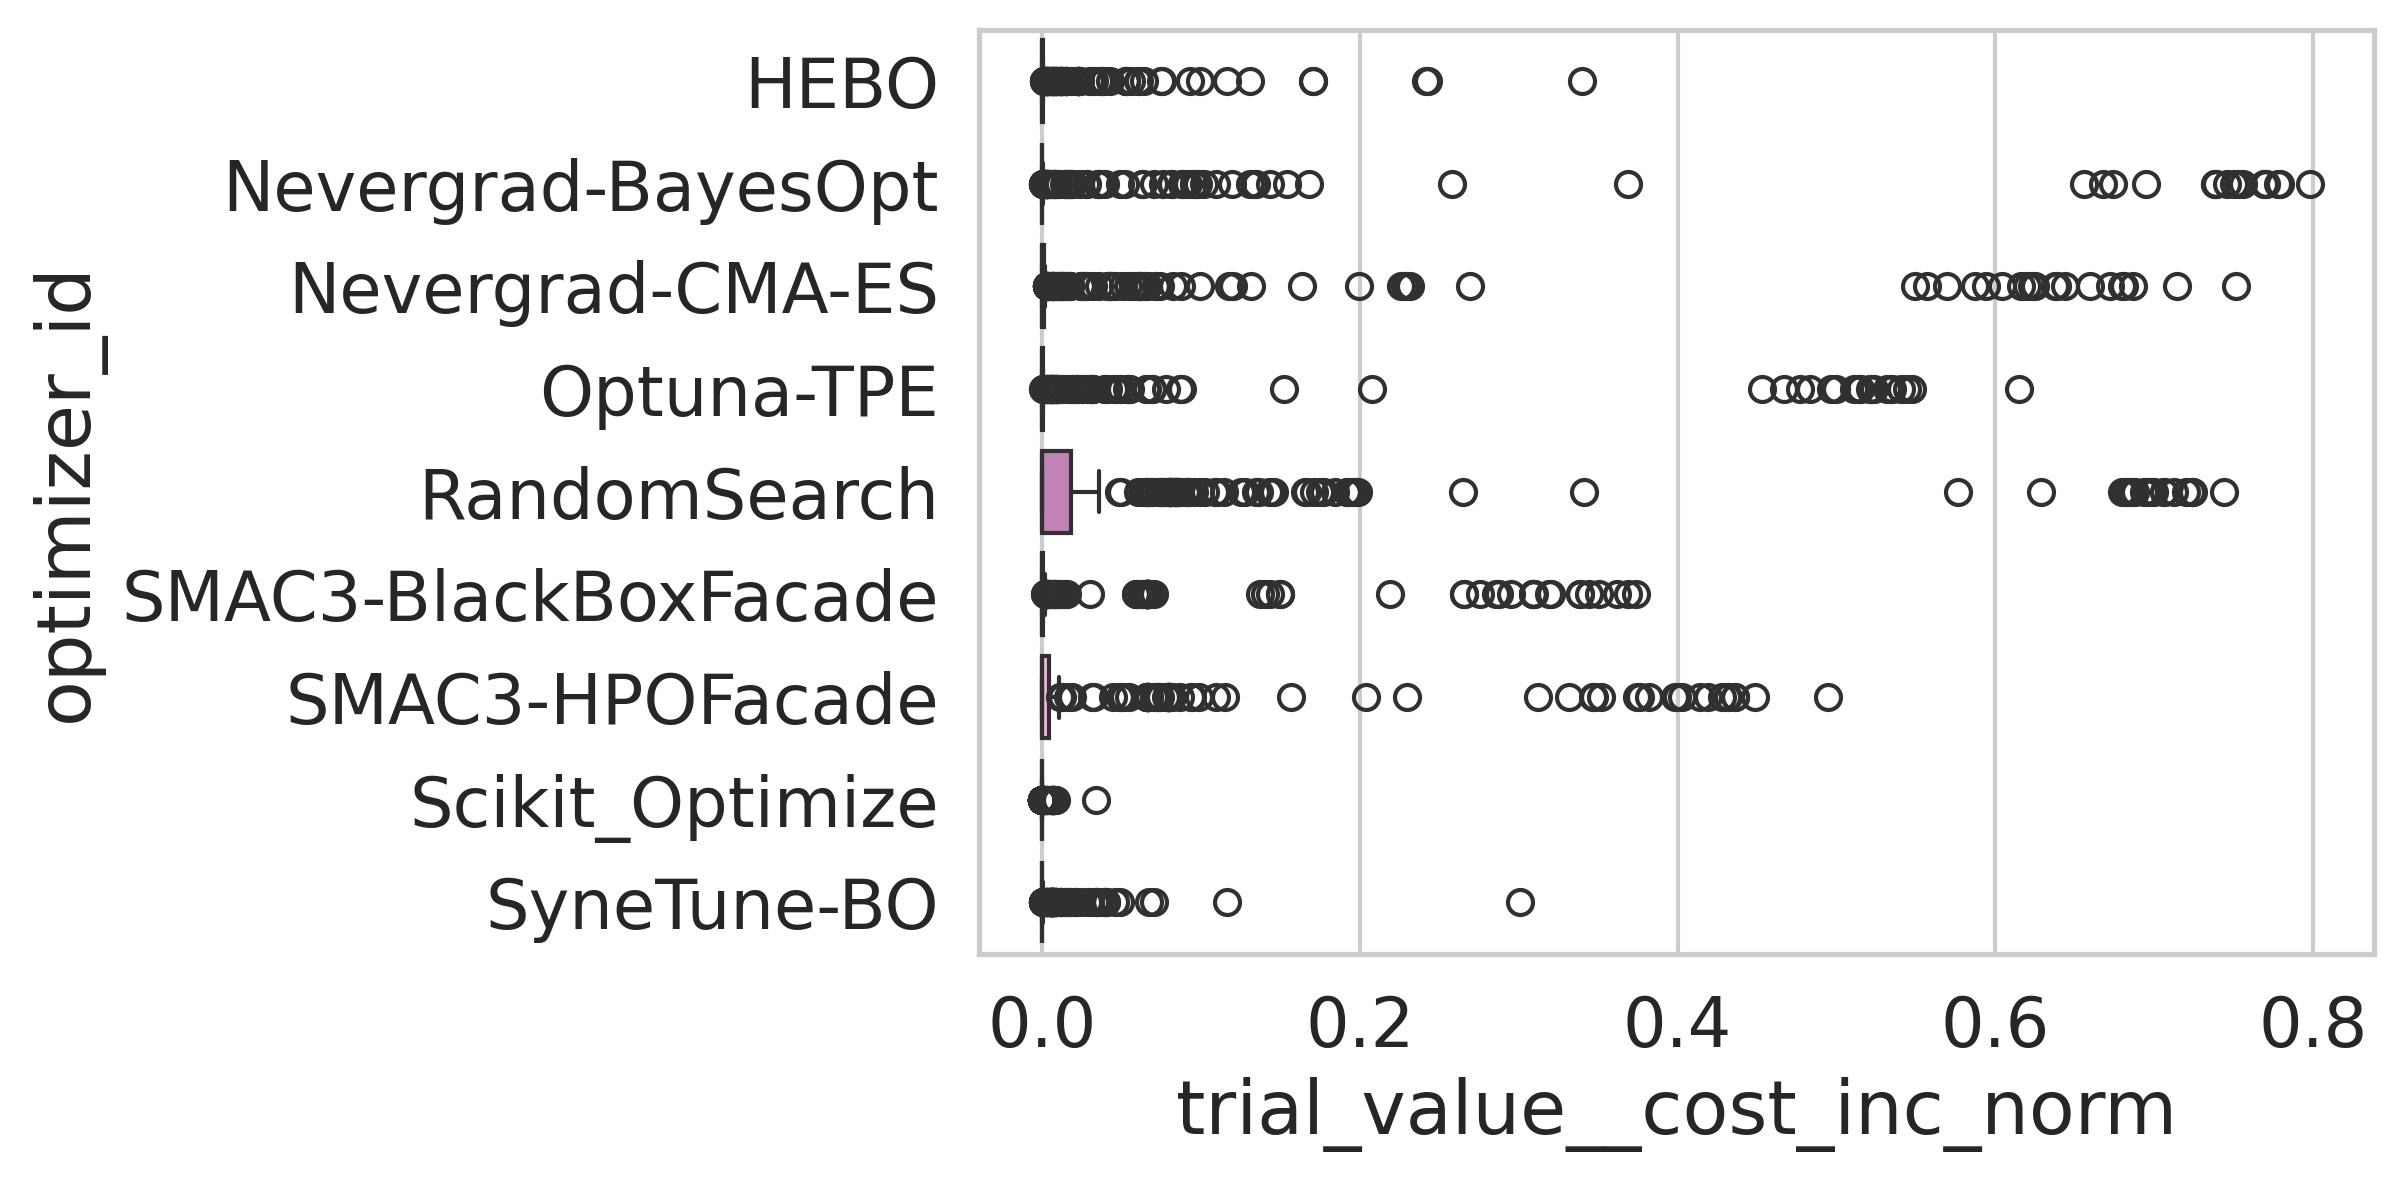

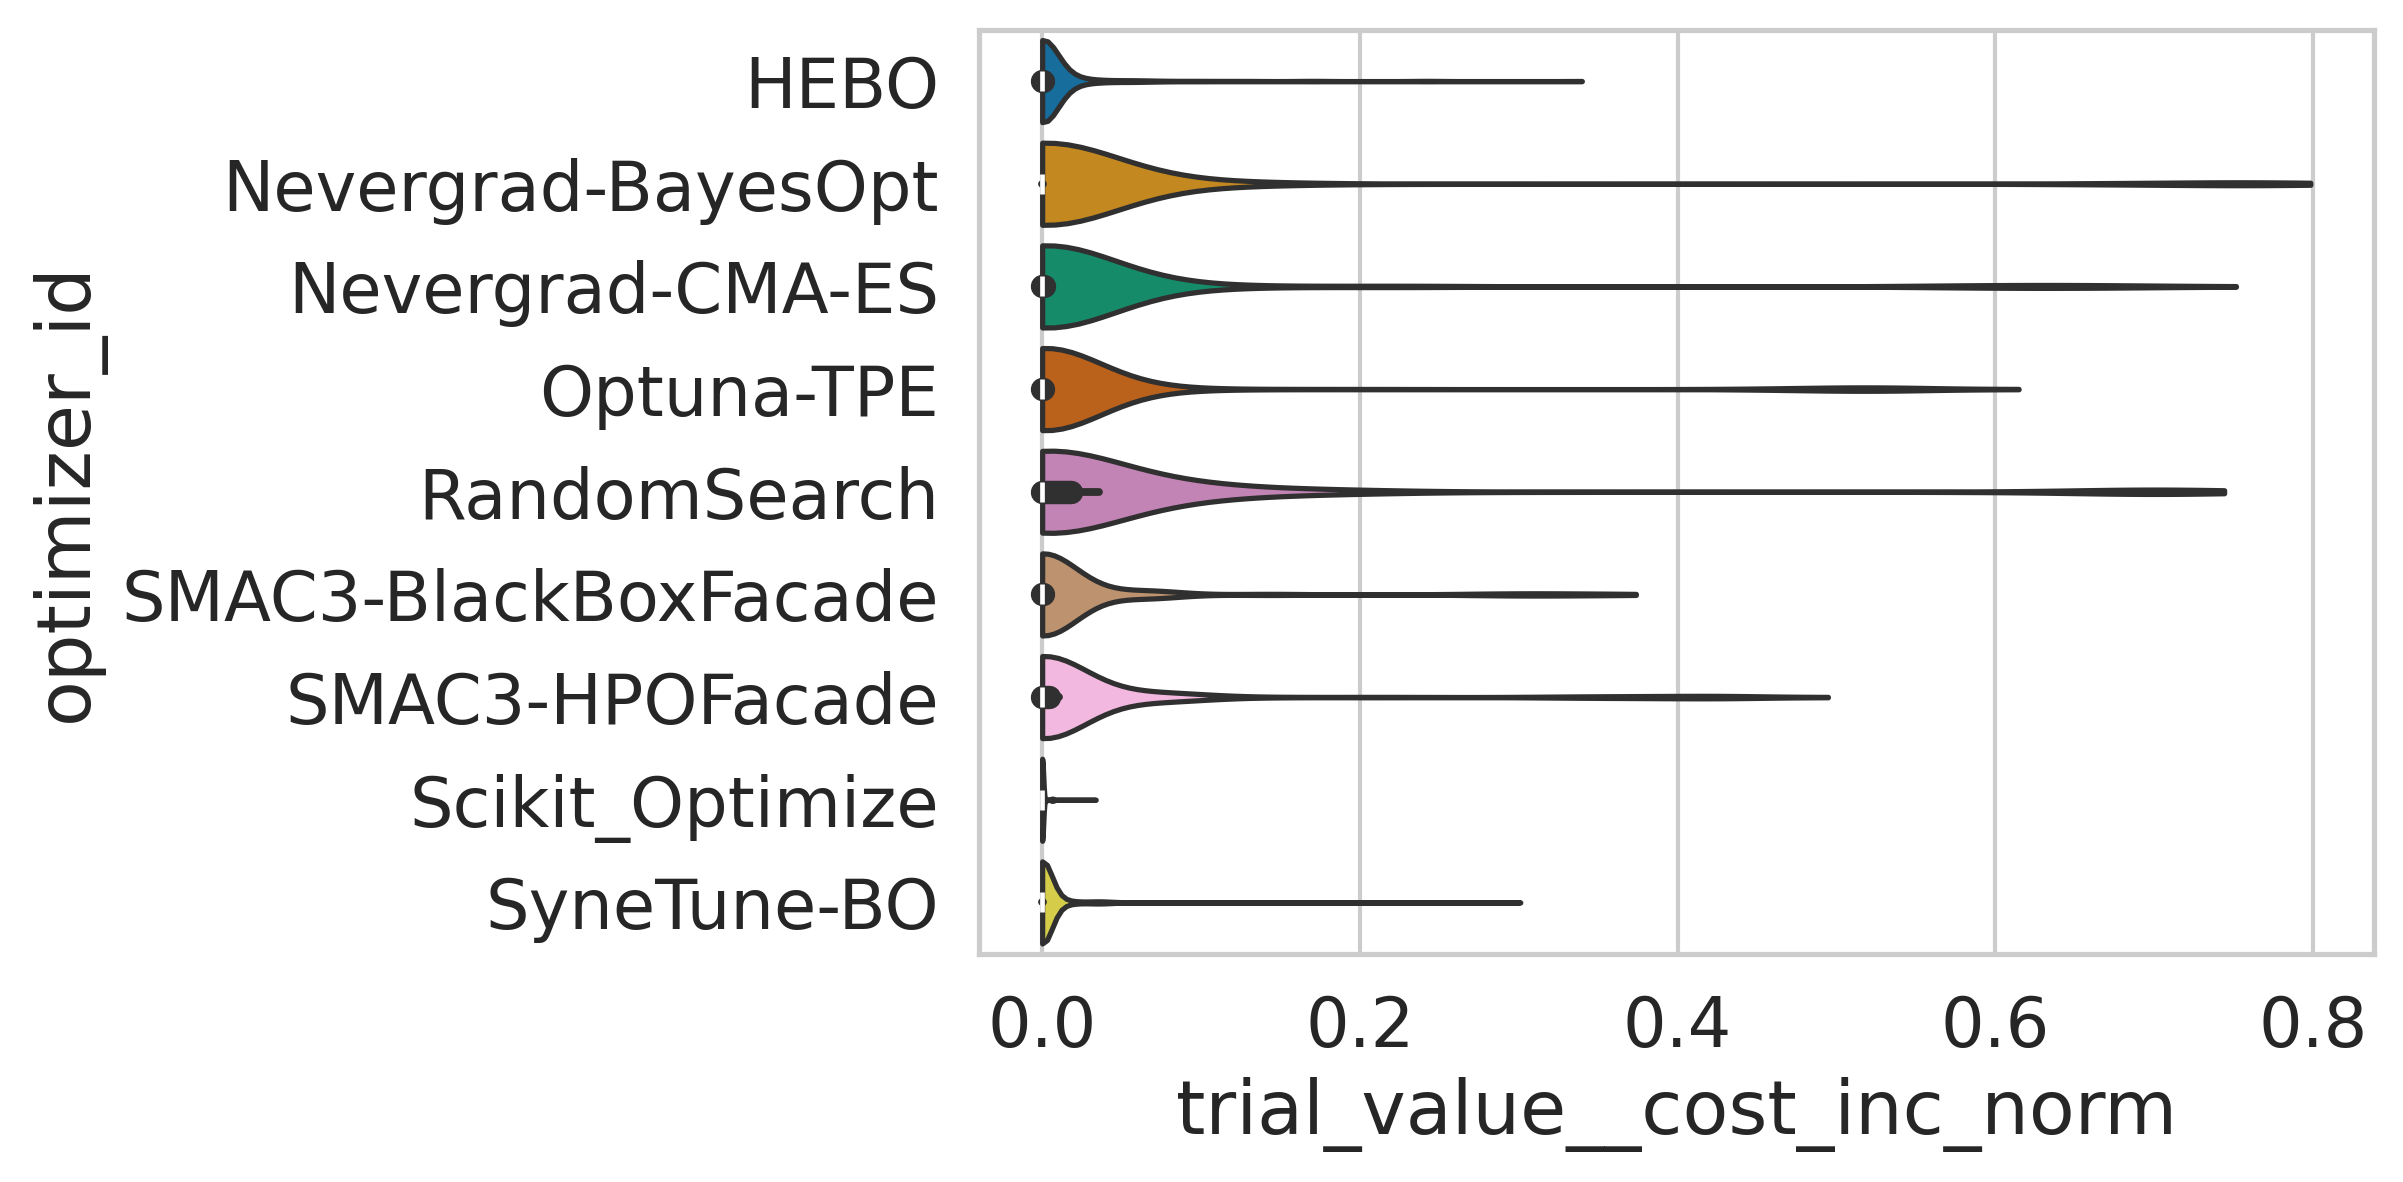

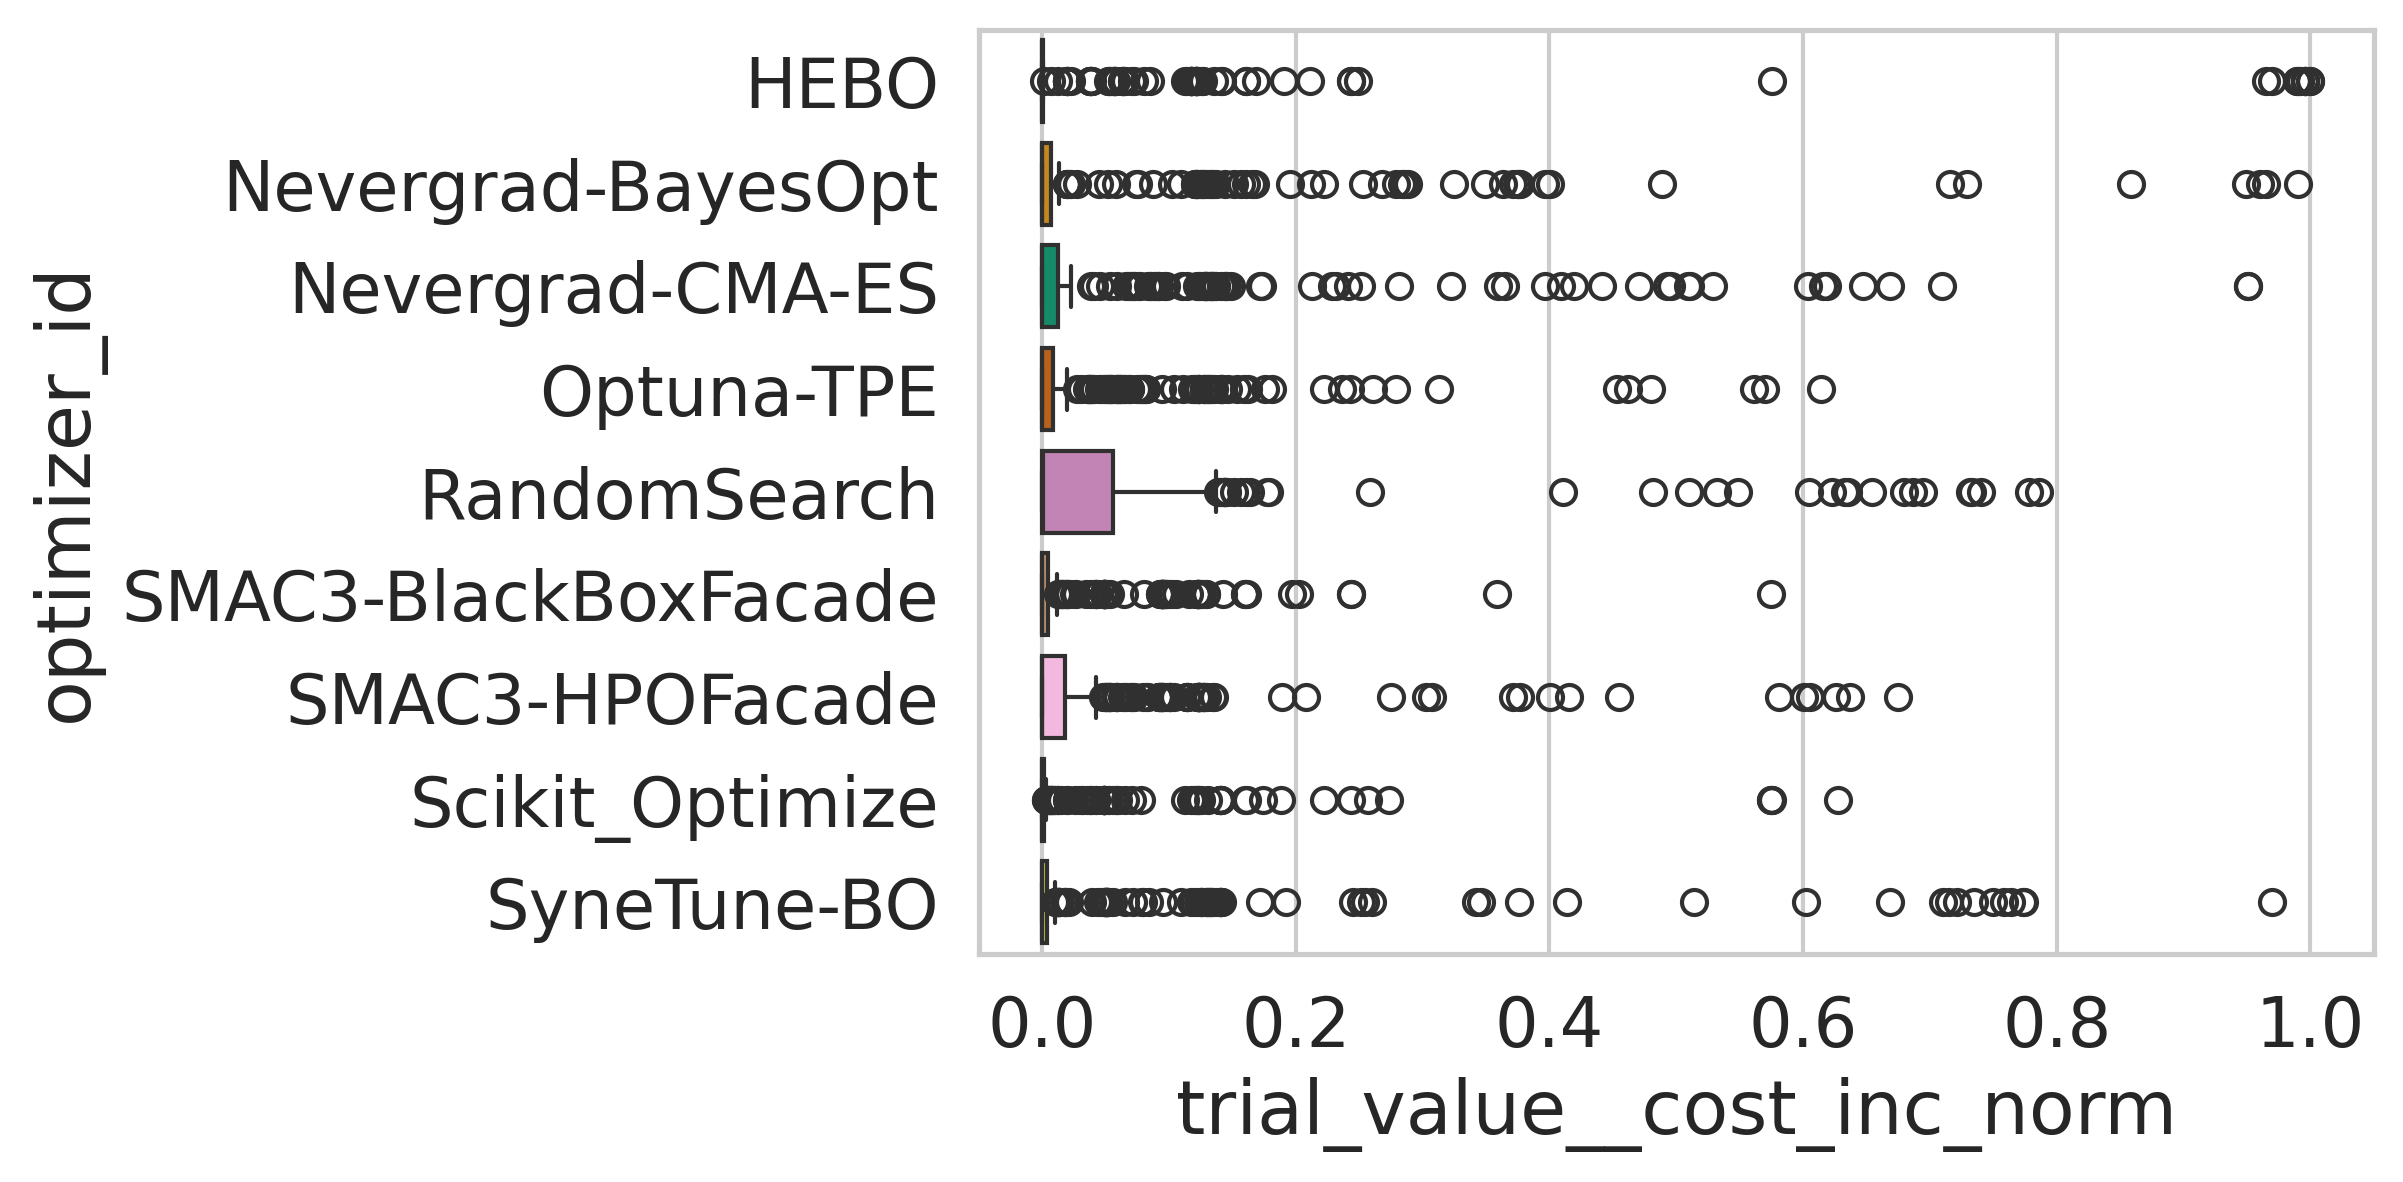

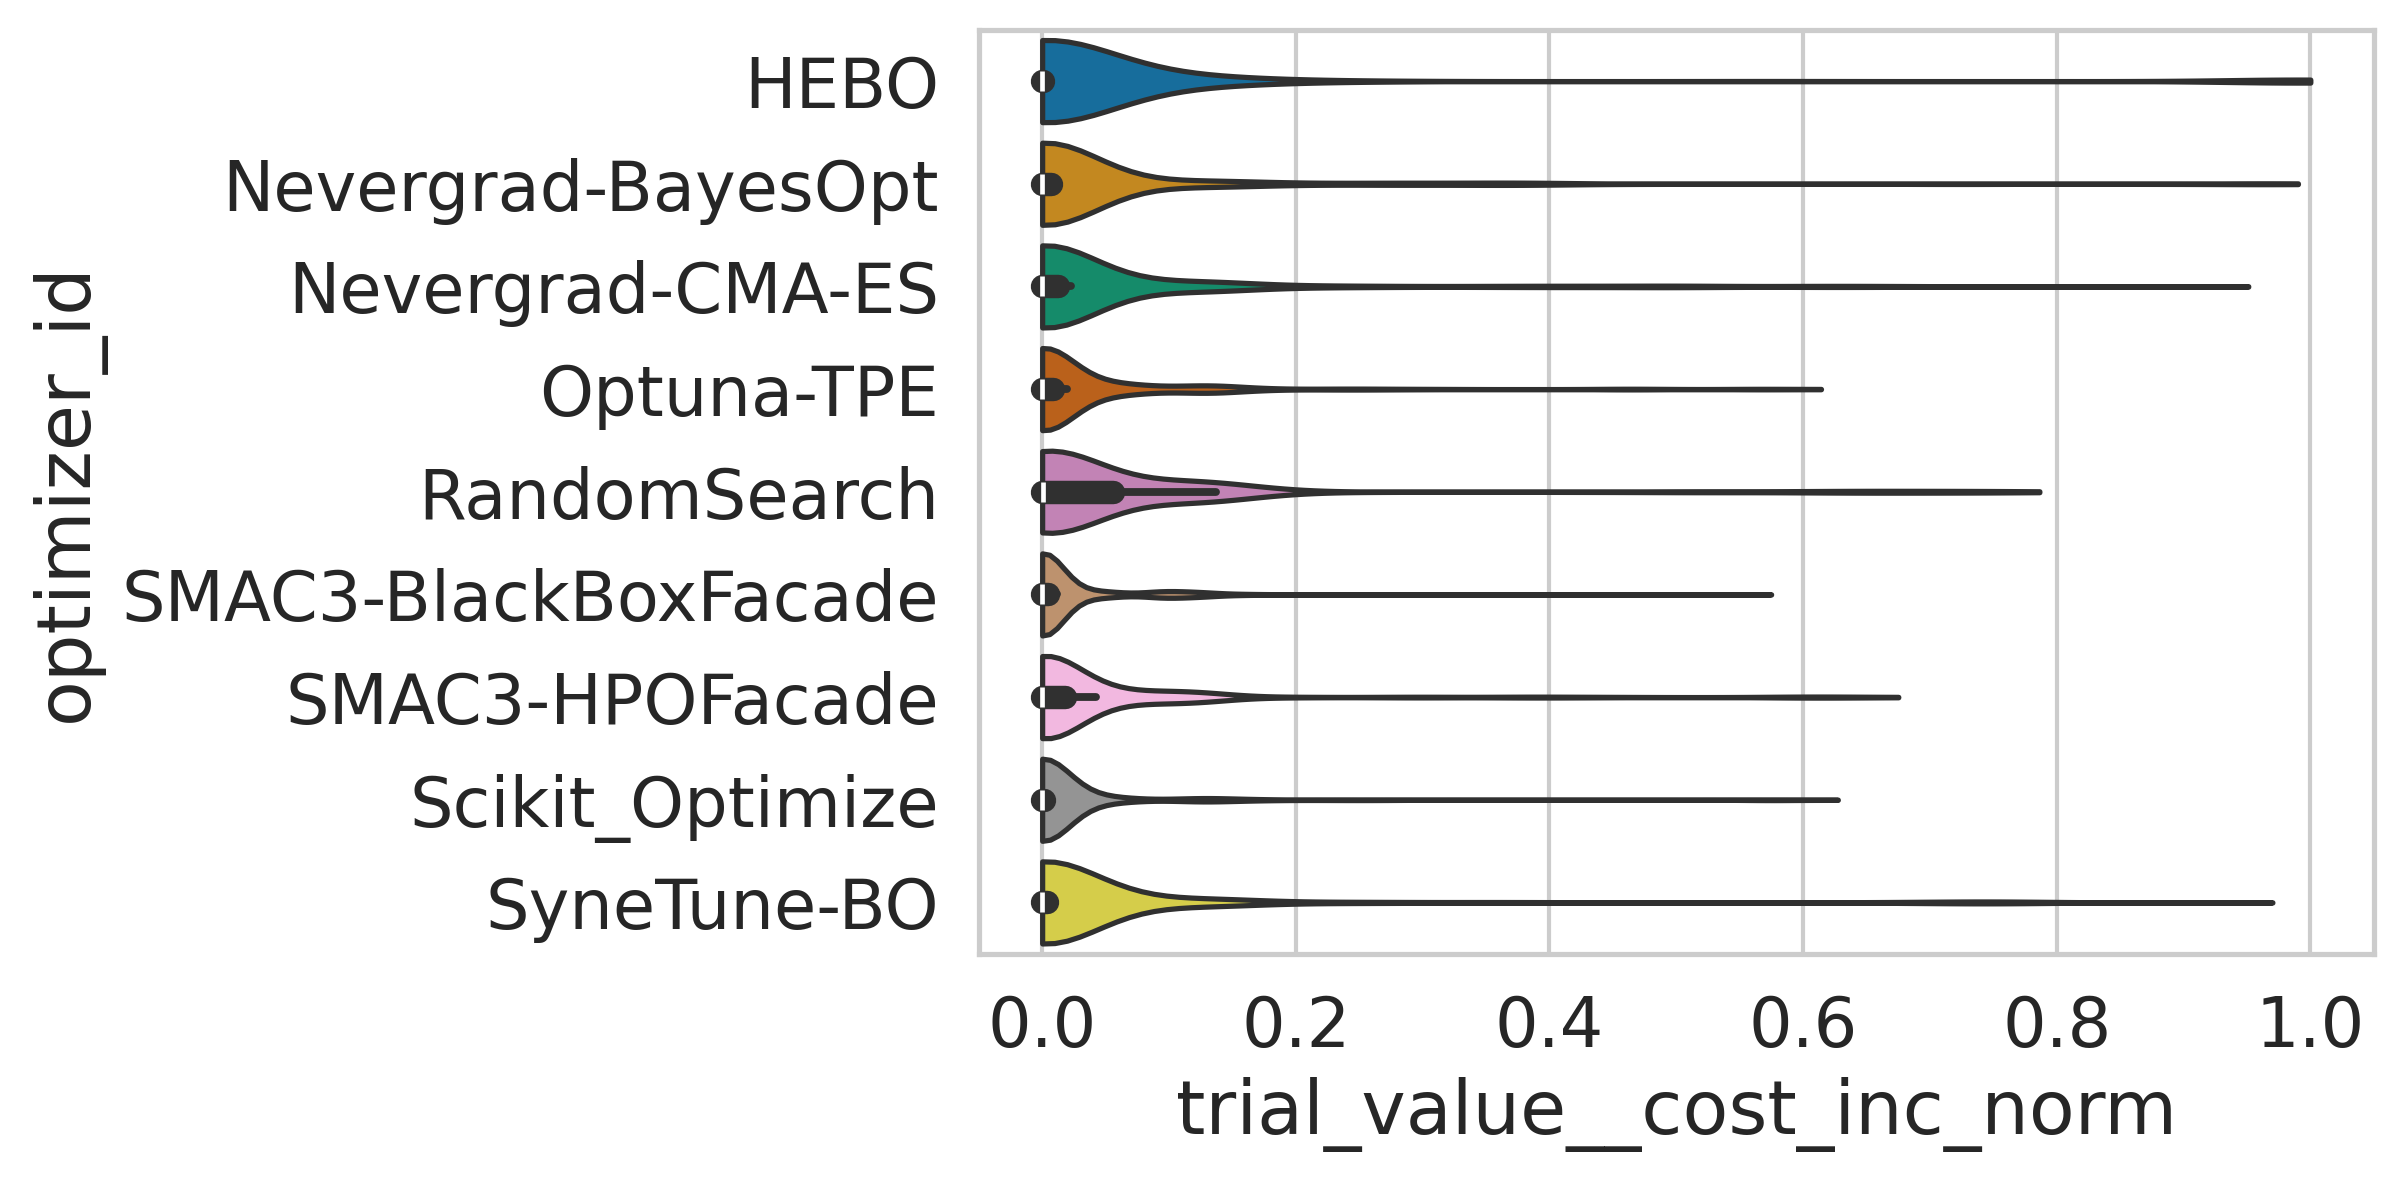

In [6]:
from carps.analysis.final_performance import plot_final_performance_boxplot, plot_final_performance_violinplot
from carps.analysis.utils import filter_only_final_performance

boxplot_kwargs = dict()

for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_final_performance_boxplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_boxplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)
    fig, ax = plot_final_performance_violinplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_violinplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)

In [7]:
max_val = df["n_trials_norm"].max()
error = df.groupby(by=["benchmark_id", "problem_id", "optimizer_id", "seed"])["n_trials_norm"].apply(lambda x: not np.isclose(x.max(), max_val))
error = error[error]
for i in error.index:
    print(i)

('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 1)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 2)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 3)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 4)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 5)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 6)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 7)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 8)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 9)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 10)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 11)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 12)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 13)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/12/0', 'SyneTune-BO', 14)
('BBOB', 'blackbox/20/dev/bbob/noiseless/2/